In [5]:
# 데이터 분석 및 다루기
import pandas as pd
import numpy as np

# 데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
train_df = pd.read_csv('/content/drive/MyDrive/데이콘/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/데이콘/test.csv')

In [7]:
train_df.columns.values

array(['id', 'date', 'route_id', 'vh_id', 'route_nm', 'now_latitude',
       'now_longitude', 'now_station', 'now_arrive_time', 'distance',
       'next_station', 'next_latitude', 'next_longitude',
       'next_arrive_time'], dtype=object)

In [8]:
train_df.head(10)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
5,5,2019-10-15,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,07시,417.0,대림2차아파트,33.478850,126.488350,160
6,6,2019-10-15,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,07시,334.0,연동대림1차아파트,33.480700,126.489933,58
7,7,2019-10-15,405136001,7997025,360-1,33.482142,126.483213,롯데마트,07시,341.0,원노형,33.483446,126.480758,64
8,8,2019-10-15,405136001,7997025,360-1,33.483446,126.480758,원노형,07시,185.0,노형오거리,33.485854,126.480530,54
9,9,2019-10-15,405136001,7997025,360-1,33.485854,126.480530,노형오거리,07시,252.0,남녕고등학교,33.488046,126.483112,204


*   id => 의미 없음
*   date : 버스 운행 날짜
*   route_id : 버스 노선 id => route_nm이랑 동일한 역할
*   vh_id : 버스 id => 제외
*   route_nm : 버스 노선 실제 번호 => route_id랑 동일한 역할
*   now_latitude : 현재 정류소의 위도
*   now_longitude : 현재 정류소의 경도
*   now_station : 현재 정류소 이름
*   now_arrive_time : 현재 정류장에 도착한 시간 => int로 바꿔줘야함
*   distance : 현재 정류장에서 다음 정류장까지 실제 이동한 거리
*   next_station : 다음 정류소 이름
*   next_latitude : 다음 정류소의 위도
*   next_longitude : 다음 정류소의 경도
*  ***next_arrive_time : 다음 정류장에 도착할 때 걸리는 시간(단위: 초) 예측해야하는 값***



In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 22.5+ MB


In [10]:
print(len(train_df['route_id'].unique()))
print(len(train_df['route_nm'].unique()))
print(len(train_df['vh_id'].unique()))

21
21
104


In [11]:
route = train_df['route_nm'].unique();
total = 0
for r in route:
  temp = train_df[train_df['route_nm']==r]
  total+=len(temp['vh_id'].unique())

print(total)

104


route_id == route_nm  
이것들을 세분화하면  
vh_id

In [12]:
train_df.describe()

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time
count,210457.000000,2.104570e+05,2.104570e+05,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000
mean,105228.000000,4.052491e+08,7.988694e+06,33.434528,126.603451,490.256100,33.434711,126.603687,85.380824
std,60753.847139,9.132404e+04,6.774077e+03,0.102350,0.123961,520.563932,0.102224,0.123838,85.051170
min,0.000000,4.051360e+08,7.983000e+06,33.244382,126.473300,97.000000,33.244382,126.473300,6.000000
25%,52614.000000,4.051365e+08,7.983093e+06,33.325283,126.523900,291.000000,33.325283,126.524550,44.000000
50%,105228.000000,4.053201e+08,7.983431e+06,33.484667,126.551050,384.000000,33.484860,126.551050,66.000000
75%,157842.000000,4.053201e+08,7.997041e+06,33.500197,126.650322,542.000000,33.500228,126.650322,102.000000
max,210456.000000,4.053281e+08,7.997124e+06,33.556167,126.935188,7461.000000,33.556167,126.935188,2996.000000


In [13]:
train_df.describe(include=['O'])

,date,route_nm,now_station,now_arrive_time,next_station
count,210457,210457,210457,210457,210457
unique,14,21,348,20,351
top,2019-10-15,365-22,남국원(아라방면),08시,은남동
freq,15980,31941,3361,13838,3519


In [14]:
train_df['date'] = pd.to_datetime(train_df['date'])
train_df['weekday'] = train_df['date'].dt.strftime('%a')
train_df.head()

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,weekday
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24,Tue
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36,Tue
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40,Tue
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42,Tue
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64,Tue


In [15]:
train_df[['weekday', 'next_arrive_time']].groupby(['weekday'], as_index = False).mean().sort_values(by = 'next_arrive_time', ascending = False)

,weekday,next_arrive_time
0,Fri,86.913709
4,Thu,86.487632
6,Wed,86.133721
1,Mon,85.926136
5,Tue,85.476095
2,Sat,83.720544
3,Sun,82.714732


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


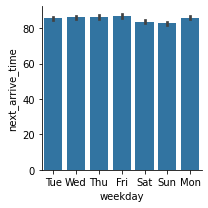

In [16]:
grid = sns.FacetGrid(train_df)
grid.map(sns.barplot, 'weekday', 'next_arrive_time')

요일과는 상관이 없음, 의외임

In [17]:
train_df[['date', 'next_arrive_time']].groupby(['date'], as_index = False).mean().sort_values(by = 'next_arrive_time', ascending = False)

,date,next_arrive_time
3,2019-10-18,87.000265
2,2019-10-17,86.896218
10,2019-10-25,86.826195
13,2019-10-28,86.257282
1,2019-10-16,86.170848
8,2019-10-23,86.096327
9,2019-10-24,86.057099
0,2019-10-15,85.666458
6,2019-10-21,85.626436
7,2019-10-22,85.277673


역시 날짜도 상관없음

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


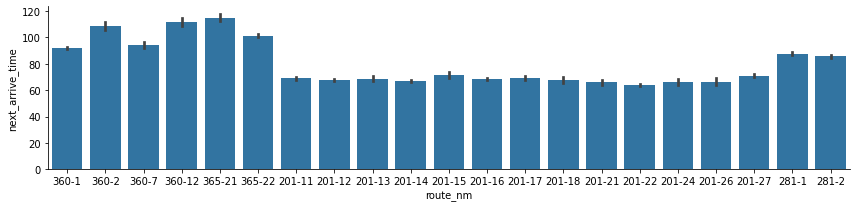

In [18]:
grid = sns.FacetGrid(train_df, aspect=4)
grid.map(sns.barplot, 'route_nm', 'next_arrive_time')

360번대, 180번대 버스가 좀 더 늦음

In [19]:
train_df['now_arrive_int'] = train_df['now_arrive_time'].apply(lambda x : int(x[:-1]))

In [20]:
train_df[['now_arrive_int', 'next_arrive_time']].groupby(['now_arrive_int'], as_index = False).mean().sort_values(by = 'next_arrive_time', ascending = False)

,now_arrive_int,next_arrive_time
1,5,132.956879
14,18,94.958882
13,17,90.705271
4,8,87.666715
15,19,87.240979
12,16,86.759573
2,6,85.986443
3,7,85.488697
11,15,84.904250
9,13,84.070471


5시에만 outlier가 있는건가?

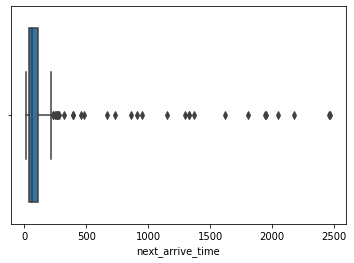

In [21]:
sns.boxplot(x='next_arrive_time', data=train_df[train_df['now_arrive_int']==5])
plt.show()

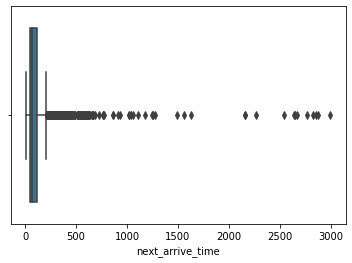

In [22]:
sns.boxplot(x='next_arrive_time', data=train_df[train_df['now_arrive_int']==18])
plt.show()

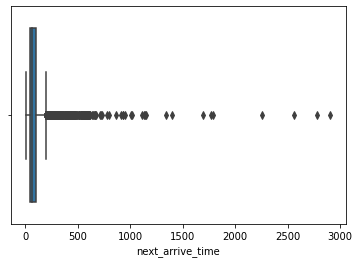

In [23]:
sns.boxplot(x='next_arrive_time', data=train_df[train_df['now_arrive_int']==17])
plt.show()

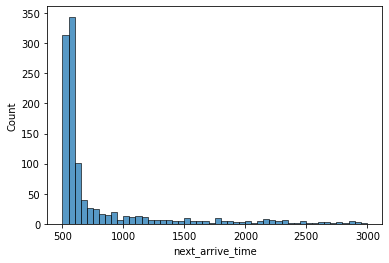

In [24]:
sns.histplot(data=train_df[train_df['next_arrive_time']>=500], x='next_arrive_time', bins=50)

next_arrive_time 650부터 drop하면 될듯  
outlier로 봐도되는건지.......

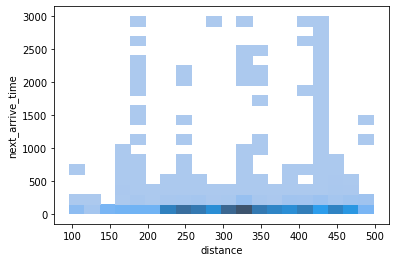

In [25]:
sns.histplot(data=train_df[train_df['distance']<=500], x='distance', y='next_arrive_time', bins=20)

distance를 몇씩 쪼갤지 고민. 50씩 쪼개도 괜찮을듯

In [26]:
train_df['dist_band']=0
for i in range(150):
  train_df.loc[(train_df['distance']>50*i)&(train_df['distance']<=50*(i+1)), 'dist_band'] = i+1

train_df[['distance', 'dist_band']].head()

,distance,dist_band
0,266.0,6
1,333.0,7
2,415.0,9
3,578.0,12
4,374.0,8


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


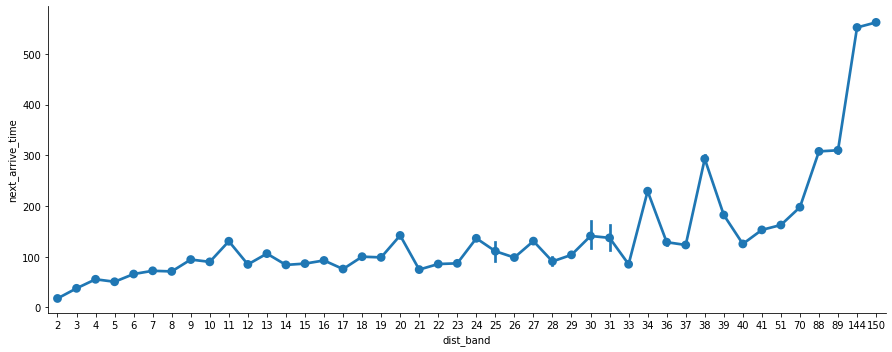

In [27]:
sns.factorplot('dist_band','next_arrive_time',data=train_df, aspect=2.5)

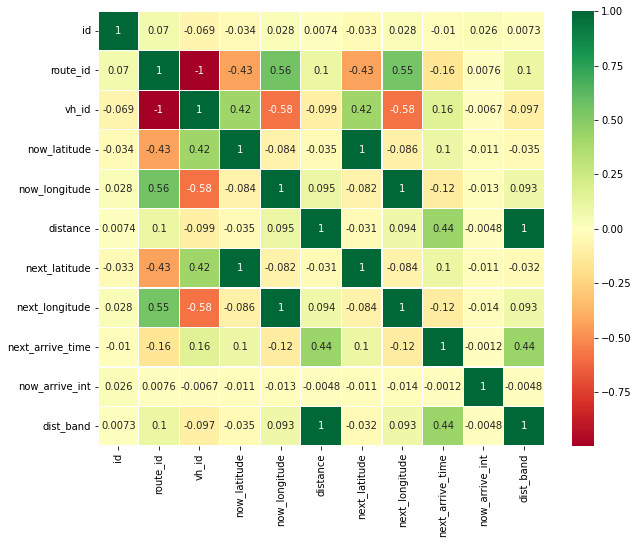

In [28]:
sns.heatmap(train_df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

dist랑 조금이지만 route_id(route_nm, vh_id)가 관련이있음.

https://ko.wikipedia.org/wiki/%EC%A0%9C%EC%A3%BC%ED%8A%B9%EB%B3%84%EC%9E%90%EC%B9%98%EB%8F%84%EC%9D%98_%EC%8B%9C%EB%82%B4%EB%B2%84%EC%8A%A4_%EB%85%B8%EC%84%A0_%EB%AA%A9%EB%A1%9D  

배차간격이 짧으면 오래걸릴 수 있음, 사람이 많이 타는 구간  

https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=184&yy=2019&mm=10&obs=1  

강수량  

위도, 경도를 이용한 (실제거리 - 직선거리)/실제거리 비율 -> 커브가 많으면 오래걸리지 않을까?  

위도, 경도를 직접 입력/크롤링해서.. 안됨 ㅋㅋㅋㅋ  

vh_id 별로 속도가 다르지 않을까????

5시 outlier 제외  

거리 그대로

In [34]:
route_uniq = train_df['route_nm'].unique()

for r in route_uniq:
  data_365_22 = train_df[train_df['route_nm'] == r]
  new_data = data_365_22.groupby(["vh_id","now_arrive_time"])['next_arrive_time'].median().reset_index()

  data_365_22.pivot_table(index=["vh_id"],columns="now_arrive_time",values="next_arrive_time")

In [40]:
train_df[train_df['now_arrive_int']==5 and train_df['']]

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,weekday,now_arrive_int,dist_band
1266,1266,2019-10-15,405136001,7997080,360-1,33.484860,126.542928,제주여자중고등학교(아라방면),05시,578.0,남국원(아라방면),33.479705,126.543811,38,Tue,5,12
1267,1267,2019-10-15,405136001,7997080,360-1,33.479705,126.543811,남국원(아라방면),05시,355.0,아라초등학교,33.476533,126.544283,44,Tue,5,8
1268,1268,2019-10-15,405136001,7997080,360-1,33.476533,126.544283,아라초등학교,05시,350.0,아라주공아파트,33.473655,126.545425,38,Tue,5,7
1269,1269,2019-10-15,405136001,7997080,360-1,33.473655,126.545425,아라주공아파트,05시,244.0,인다마을,33.471450,126.545400,24,Tue,5,5
1270,1270,2019-10-15,405136001,7997080,360-1,33.471450,126.545400,인다마을,05시,330.0,제주대학교병원,33.469089,126.547389,28,Tue,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204203,204203,2019-10-28,405320114,7983228,201-14,33.249504,126.558068,평생학습관,05시,223.0,아랑조을거리 입구,33.251084,126.559551,38,Mon,5,5
204204,204204,2019-10-28,405320114,7983228,201-14,33.250883,126.564050,청소년문화의집,05시,218.0,매일올레시장 7번입구,33.249753,126.565959,54,Mon,5,5
204205,204205,2019-10-28,405320114,7983228,201-14,33.249753,126.565959,매일올레시장 7번입구,05시,280.0,동문로터리,33.248595,126.568527,74,Mon,5,6
204206,204206,2019-10-28,405320114,7983228,201-14,33.248595,126.568527,동문로터리,05시,384.0,주공 3 4단지,33.250098,126.571865,64,Mon,5,8
